In [1]:
import pandas as pd

# 1. read the file into a DataFrame
df = pd.read_csv('../data/continents.csv', sep=";")
print(df)

         continent    country
0           Africa    Algeria
1           Africa     Angola
2           Africa      Benin
3           Africa   Botswana
4           Africa    Burkina
..             ...        ...
189  South America   Paraguay
190  South America       Peru
191  South America   Suriname
192  South America    Uruguay
193  South America  Venezuela

[194 rows x 2 columns]


In [60]:
# 2. display the number of rows and columns
df.shape

(194, 2)

In [51]:

# 3. display the first 5 countries in the alphabet
#print(df.sort_values('country').head())
df.country.sort_values().head()


54    Afghanistan
98        Albania
0         Algeria
99        Andorra
1          Angola
Name: country, dtype: object

In [62]:
df.sort_values('country').head()

,continent,country
54,Asia,Afghanistan
98,Europe,Albania
0,Africa,Algeria
99,Europe,Andorra
1,Africa,Angola


In [58]:
# 4. which continent has the most countries?
#df.groupby.continent
df.groupby(['continent']).count().head(1)

,country
continent,
Africa,54


In [64]:
df.groupby('continent').count().idxmax()

country    Africa
dtype: object

In [66]:
df['continent'].value_counts().head(1)

Africa    54
Name: continent, dtype: int64

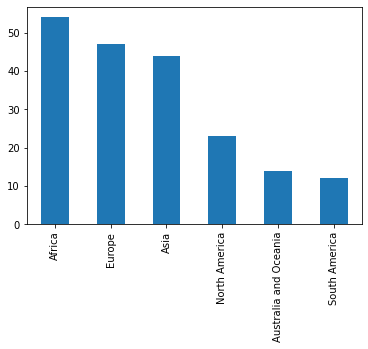

In [67]:
df.continent.value_counts().plot.bar()

In [19]:
# 5. find out on which continent Cyprus is
df[df['country'] == 'Cyprus']

,continent,country
108,Europe,Cyprus


In [69]:
df.loc[df['country'] == 'Cyprus']

,continent,country
108,Europe,Cyprus


In [22]:

# 6. define a DataFrame with all African countries
africa = df[df.continent == 'Africa']
africa.head()

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [24]:

# 7. define a DataFrame with countries 80 through 100
subset = df.iloc[80:101]
subset

,continent,country
80,Asia,Nepal
81,Asia,Oman
82,Asia,Pakistan
83,Asia,Philippines
84,Asia,Qatar
85,Asia,Russian Federation
86,Asia,Saudi Arabia
87,Asia,Singapore
88,Asia,Sri Lanka
89,Asia,Syria


In [25]:


# 8. select every second country
df[df.index % 2 == 0]

,continent,country
0,Africa,Algeria
2,Africa,Benin
4,Africa,Burkina
6,Africa,Cameroon
8,Africa,Central African Republic
...,...,...
184,South America,Brazil
186,South America,Colombia
188,South America,Guyana
190,South America,Peru


In [71]:
df.iloc[range(0,len(df), 2)]

,continent,country
0,Africa,Algeria
2,Africa,Benin
4,Africa,Burkina
6,Africa,Cameroon
8,Africa,Central African Republic
...,...,...
184,South America,Brazil
186,South America,Colombia
188,South America,Guyana
190,South America,Peru


In [72]:
df.country[::2]

0                       Algeria
2                         Benin
4                       Burkina
6                      Cameroon
8      Central African Republic
                 ...           
184                      Brazil
186                    Colombia
188                      Guyana
190                        Peru
192                     Uruguay
Name: country, Length: 97, dtype: object

In [73]:
df.iloc[::2]

,continent,country
0,Africa,Algeria
2,Africa,Benin
4,Africa,Burkina
6,Africa,Cameroon
8,Africa,Central African Republic
...,...,...
184,South America,Brazil
186,South America,Colombia
188,South America,Guyana
190,South America,Peru


In [31]:
# 9. select 10 random countries
df.sample(10)

,continent,country
131,Europe,Norway
76,Asia,Lebanon
41,Africa,Seychelles
103,Europe,Belarus
29,Africa,Malawi
94,Asia,United Arab Emirates
92,Asia,Turkey
108,Europe,Cyprus
136,Europe,Serbia
152,North America,Dominica


In [74]:
# use a random sead so you can reproduce
df.sample(10, random_state=42)

,continent,country
138,Europe,Slovenia
16,Africa,Eritrea
155,North America,Grenada
96,Asia,Vietnam
68,Asia,Japan
153,North America,Dominican Republic
55,Asia,Bahrain
15,Africa,Equatorial Guinea
112,Europe,Finland
111,Europe,Estonia


In [82]:


# 10. select all countries having two or more a`s
df[df.country.str.count('a') >= 2]
#df[df['model'].str.contains('ac')]

,continent,country
3,Africa,Botswana
8,Africa,Central African Republic
15,Africa,Equatorial Guinea
19,Africa,Gambia
20,Africa,Ghana
...,...,...
176,Australia and Oceania,Papua New Guinea
177,Australia and Oceania,Samoa
181,Australia and Oceania,Vanuatu
188,South America,Guyana


0       True
1       True
2      False
3       True
4       True
       ...  
189     True
190    False
191     True
192     True
193     True
Name: country, Length: 194, dtype: bool

In [59]:
#df[df[df.country.str.contains('a')].str.contains('a')]

In [77]:
df[~df['country'].str.contains('a')].head()

,continent,country
2,Africa,Benin
5,Africa,Burundi
10,Africa,Comoros
11,Africa,Congo
13,Africa,Djibouti


In [83]:
df[df.country.str.contains('a.?a')].head() #RegEx

,continent,country
3,Africa,Botswana
20,Africa,Ghana
28,Africa,Madagascar
29,Africa,Malawi
68,Asia,Japan


## Combining two Data Frames

In [85]:
a = df.sample(5, random_state=42)
b = df.sample(5, random_state=43)

In [86]:
a

,continent,country
138,Europe,Slovenia
16,Africa,Eritrea
155,North America,Grenada
96,Asia,Vietnam
68,Asia,Japan


In [87]:
b

,continent,country
139,Europe,Spain
130,Europe,Netherlands
95,Asia,Uzbekistan
10,Africa,Comoros
82,Asia,Pakistan


### concat

In [88]:
# connects the two dataframes
pd.concat([a,b])

,continent,country
138,Europe,Slovenia
16,Africa,Eritrea
155,North America,Grenada
96,Asia,Vietnam
68,Asia,Japan
139,Europe,Spain
130,Europe,Netherlands
95,Asia,Uzbekistan
10,Africa,Comoros
82,Asia,Pakistan


In [90]:
# concat along the other axis putting them next to each other horizontally
pd.concat([a,b], axis=1)

,continent,country,continent,country
10,NaN,NaN,Africa,Comoros
16,Africa,Eritrea,NaN,NaN
68,Asia,Japan,NaN,NaN
82,NaN,NaN,Asia,Pakistan
95,NaN,NaN,Asia,Uzbekistan
96,Asia,Vietnam,NaN,NaN
130,NaN,NaN,Europe,Netherlands
138,Europe,Slovenia,NaN,NaN
139,NaN,NaN,Europe,Spain
155,North America,Grenada,NaN,NaN


In [ ]:
c = pd.DataFrame({'color':['green', 'blue', 'yellow']})

### Join 

In [91]:
d = pd.DataFrame({'country': ['Japan', 'Vietnam', 'Germany'], 'food':['sushi', 'summer rolls', 'Maultaschen']})

In [92]:
d

,country,food
0,Japan,sushi
1,Vietnam,summer rolls
2,Germany,Maultaschen


In [93]:
pd.merge(a, d, how = 'inner', on = 'country')

,continent,country,food
0,Asia,Vietnam,summer rolls
1,Asia,Japan,sushi


In [94]:
# because of the inner join the output is only for the two lines that are in both

In [97]:
pd.merge(a,d, how='outer', on ='country')

,continent,country,food
0,Europe,Slovenia,NaN
1,Africa,Eritrea,NaN
2,North America,Grenada,NaN
3,Asia,Vietnam,summer rolls
4,Asia,Japan,sushi
5,NaN,Germany,Maultaschen


In [96]:
# outer join takes everything 

In [98]:
pd.merge(a,d, how='right', on='country')

,continent,country,food
0,Asia,Vietnam,summer rolls
1,Asia,Japan,sushi
2,NaN,Germany,Maultaschen


In [100]:
# right => food column has to be full
pd.merge(a,d,how='left',on='country')

,continent,country,food
0,Europe,Slovenia,NaN
1,Africa,Eritrea,NaN
2,North America,Grenada,NaN
3,Asia,Vietnam,summer rolls
4,Asia,Japan,sushi
